<a href="https://colab.research.google.com/github/malofeevakate/A-A_test_research/blob/main/AA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [ ]:
df = pd.read_csv('hw_aa.csv', sep = ';', index_col = 0)

In [ ]:
# experimentVariant – вариант эксперимента
# version – версия приложения
# purchase – факт покупки
df

,uid,experimentVariant,version,purchase
1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...
127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


  0%|          | 0/1000 [00:00<?, ?it/s]

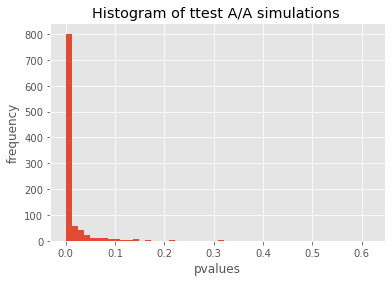

0.921

In [ ]:
simulations = 1000    # размер симуляций
n_s = 1000    # количество наблюдений в подвыборке, которую мы будем доставать из оригинальной
res = []

df_s1 = df[df['experimentVariant'] == 1].purchase
df_s2 = df[df['experimentVariant'] == 0].purchase

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df_s1.sample(n_s, replace = False).values    # из ранее сформированного эксп распределения s1 берем подвыборки БЕЗ ВОЗВРАЩЕНИЙ
    s2 = df_s2.sample(n_s, replace = False).values    # из ранее сформированного эксп распределения s2 берем подвыборки БЕЗ ВОЗВРАЩЕНИЙ
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
df_versions = df.groupby(['experimentVariant', 'version'], as_index = False) \
.agg({'purchase' : 'count'})

In [ ]:
df_versions

,experimentVariant,version,purchase
0,0,v2.8.0,41283
1,0,v2.9.0,11921
2,0,v3.7.4.0,4204
3,0,v3.8.0.0,5694
4,1,v2.8.0,41552
5,1,v2.9.0,12033
6,1,v3.7.4.0,4221
7,1,v3.8.0.0,6110


<AxesSubplot:xlabel='version', ylabel='count'>

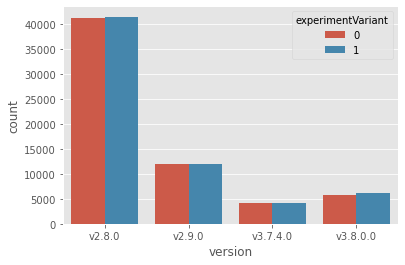

In [ ]:
# видно, что общее число наблюдений в разрезе версий приложения распределено достаточно равномерно по вариантам эксперимента
sns.countplot(x = 'version',  hue = 'experimentVariant', data = df)

In [ ]:
# посчитаем конверсию покупок в разрезе используемых пользователями приложений
df['count_purchase'] = df.purchase
df_versions = df.groupby(['experimentVariant', 'version'], as_index = False) \
.agg({'purchase' : 'sum', 'count_purchase' : 'count'})

In [ ]:
df_versions['conversion'] = df_versions.purchase  / df_versions.count_purchase

In [ ]:
# видно, что группа с приложением v2.8.0 из варианта 1 значимо отличается от остальных групп по конверсии
df_versions

,experimentVariant,version,purchase,count_purchase,conversion
0,0,v2.8.0,41,41283,0.000993
1,0,v2.9.0,890,11921,0.074658
2,0,v3.7.4.0,252,4204,0.059943
3,0,v3.8.0.0,328,5694,0.057604
4,1,v2.8.0,1895,41552,0.045606
5,1,v2.9.0,858,12033,0.071304
6,1,v3.7.4.0,266,4221,0.063018
7,1,v3.8.0.0,384,6110,0.062848


In [ ]:
# однако доля ее в общей выборке весьма значима - более 65% наблюдений
df.version.value_counts(normalize = True)

v2.8.0      0.652152
v2.9.0      0.188587
v3.8.0.0    0.092932
v3.7.4.0    0.066329
Name: version, dtype: float64

In [ ]:
# удалим указанную группу из выборки и повторим эксперимент
df = df.query('version != "v2.8.0"')

  0%|          | 0/1000 [00:00<?, ?it/s]

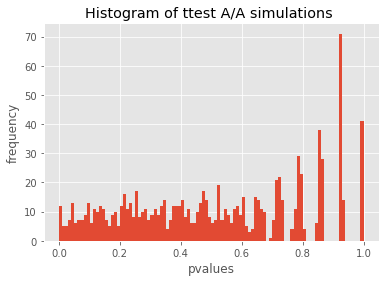

0.041

In [ ]:
simulations = 1000    # размер симуляций
n_s = 1000    # количество наблюдений в подвыборке, которую мы будем доставать из оригинальной
res = []

df_s1 = df[df['experimentVariant'] == 1].purchase
df_s2 = df[df['experimentVariant'] == 0].purchase

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df_s1.sample(n_s, replace = False).values    # из ранее сформированного эксп распределения s1 берем подвыборки БЕЗ ВОЗВРАЩЕНИЙ
    s2 = df_s2.sample(n_s, replace = False).values    # из ранее сформированного эксп распределения s2 берем подвыборки БЕЗ ВОЗВРАЩЕНИЙ
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 100)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Первоначальный вариант сплитования (примерно равноразмерные группы пользователей с разными версиями) не дал удовлетворительной величины FPR из-за того, что не была учтена разница конверсий у пользователей версии v2.0.8 (которая составляет наибольшую часть тестовой аудитории), и в одну группу попало много пользователей с плохой конверсией. При удалении этой группы из рассматриваемой выборки FPR снизился, а значит, система сплитования улучшилась.